✅ Google Generative AI library available
✅ Gemini API configured successfully


2025-07-19 21:14:49.595 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


✅ Successfully imported main.py

🔍 Available classes and functions in main.py:
  - Dict: <class 'typing._SpecialGenericAlias'>
  - GeminiCodeExplainer: <class 'type'>
    ✅ Has explain_code method
  - List: <class 'typing._SpecialGenericAlias'>
  - Optional: <class 'typing._SpecialForm'>
  - ThreadPoolExecutor: <class 'type'>
  - Tuple: <class 'typing._TupleType'>
  - load_dotenv: <class 'function'>
  - main: <class 'function'>

✅ Successfully initialized GeminiCodeExplainer from main.py
Creating test dataset...
Created 8 test cases

📋 Test Dataset Overview:
            category complexity                                                                   expected_concepts
0  linear_regression     simple                        [weka, linear regression, instances, classifier, evaluation]
1     neural_network     medium               [deeplearning4j, neural network, dense layer, activation, multilayer]
2      random_forest     medium                   [random forest, cross validation, cla

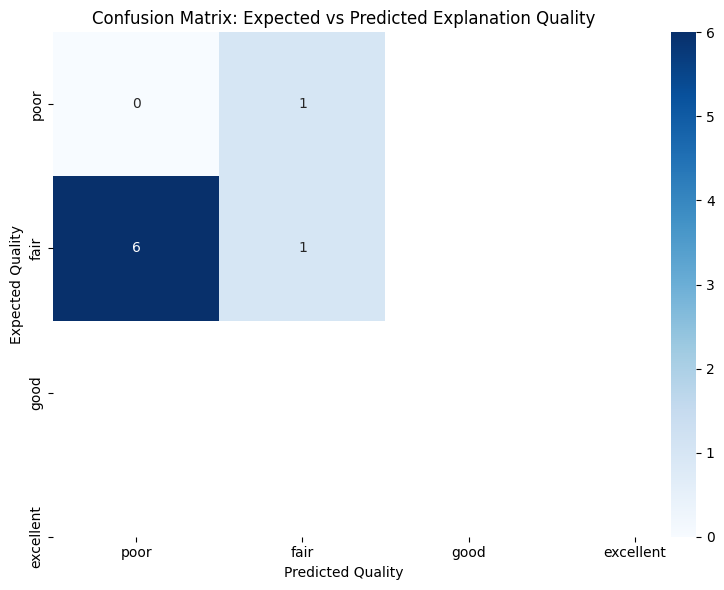

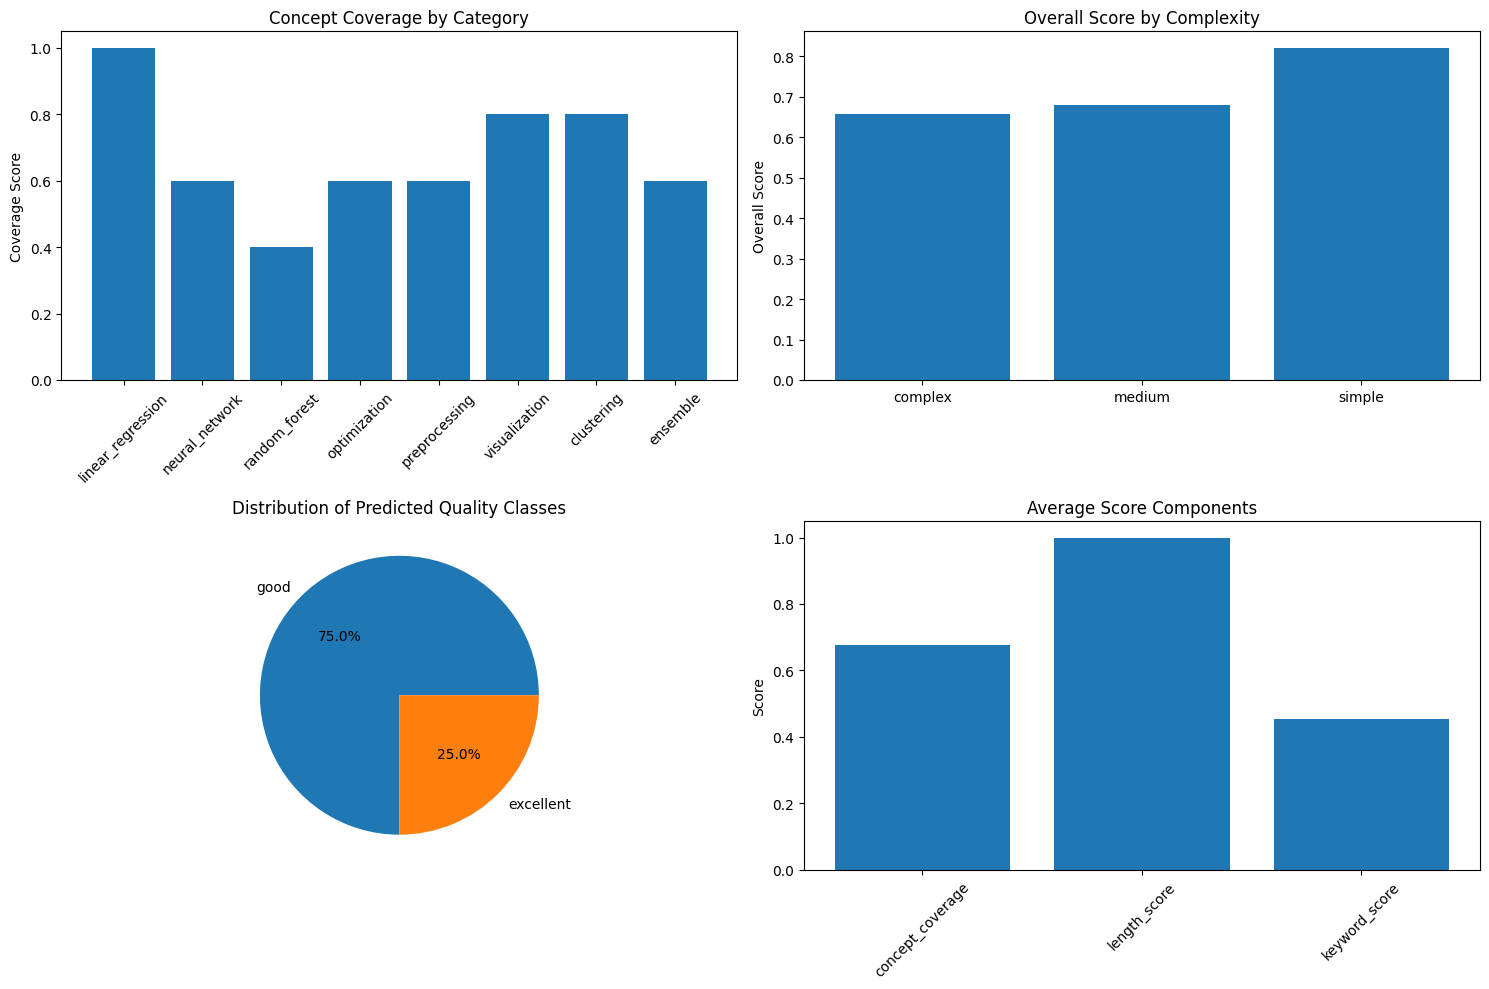


💾 Results saved to 'code_explainer_evaluation_results(JAVA).csv'

INDIVIDUAL TESTING EXAMPLE
Sample code:

import weka.classifiers.functions.LogisticRegression;
import weka.core.Instances;

public class LogisticExample {
    public static void main(String[] args) throws Exception {
        Instances data = loadData();
        data.setClassIndex(data.numAttributes() - 1);

        LogisticRegression model = new LogisticRegression();
        model.buildClassifier(data);
    }
}
    

📊 Quality score: 0.750
📊 Concept coverage: 0.750

📝 Explanation preview:
**Go Code Analysis:**

• **Module Import**: Imports external libraries/modules
• **Class Definition**: Defines `LogisticExample` class

🎯 Framework ready for testing your Java ML code explanations!


In [1]:
# ML Code Explainer Testing Framework with Gemini API Integration
# This notebook tests your code explanation system using various metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
import re
import ast
import sys
import importlib.util
import os
from typing import List, Dict, Tuple, Any
import warnings
warnings.filterwarnings('ignore')

# Import Gemini API
try:
    import google.generativeai as genai
    GEMINI_AVAILABLE = True
    print("✅ Google Generative AI library available")
except ImportError:
    GEMINI_AVAILABLE = False
    print("❌ Google Generative AI library not available. Install with: pip install google-generativeai")

# Configure Gemini API
def setup_gemini():
    """Setup Gemini API with environment variable"""
    api_key = os.getenv('GEMINI_API_KEY')
    if not api_key:
        print("❌ GEMINI_API_KEY environment variable not found")
        print("Please set it with: export GEMINI_API_KEY=your_api_key")
        return None
    
    try:
        genai.configure(api_key=api_key)
        model = genai.GenerativeModel('gemini-pro')
        print("✅ Gemini API configured successfully")
        return model
    except Exception as e:
        print(f"❌ Failed to configure Gemini API: {e}")
        return None

# Initialize Gemini model
gemini_model = None
if GEMINI_AVAILABLE:
    gemini_model = setup_gemini()

class GeminiCodeExplainer:
    """
    Code explainer using Gemini API
    """
    
    def __init__(self, model=None):
        self.model = model or gemini_model
        
    def explain_code(self, code: str, add_comments: bool = True) -> Dict[str, Any]:
        """
        Explain code using Gemini API
        
        Args:
            code: The code to explain
            add_comments: Whether to add inline comments
            
        Returns:
            Dictionary with explanation components
        """
        if not self.model:
            return {
                "error": "Gemini model not available",
                "overall_explanation": "Gemini API not configured",
                "block_explanations": [],
                "commented_code": code,
                "model_used": "none"
            }
        
        try:
            # Create prompt for overall explanation
            overall_prompt = f"""
            Analyze this Java machine learning code and provide a clear, comprehensive explanation.
            Focus on:
            1. What Java ML libraries and algorithms are being used (Weka, DL4J, etc.)
            2. What the code accomplishes
            3. Key ML concepts and Java programming patterns involved
            4. Data flow, object creation, and method calls
            
            Java Code:
            ```java
            {code}
            ```
            
            Provide a detailed explanation in 2-3 paragraphs:
            """
            
            # Get overall explanation
            overall_response = self.model.generate_content(overall_prompt)
            overall_explanation = overall_response.text.strip()
            
            # Create prompt for block-by-block explanation
            block_prompt = f"""
            Analyze this Java code line by line or block by block. For each significant block, explain:
            - What it does
            - Why it's important
            - Any ML concepts or Java patterns involved
            
            Java Code:
            ```java
            {code}
            ```
            
            Provide explanations for each significant block:
            """
            
            block_response = self.model.generate_content(block_prompt)
            block_explanations = block_response.text.strip()
            
            # Create commented code if requested
            commented_code = code
            if add_comments:
                comment_prompt = f"""
                Add inline comments to this Java code explaining what each line or block does.
                Focus on ML concepts, data transformations, object instantiation, and algorithm steps.
                Return only the commented Java code with proper Java comment syntax.
                
                Java Code:
                ```java
                {code}
                ```
                """
                
                comment_response = self.model.generate_content(comment_prompt)
                commented_code = comment_response.text.strip()
                
                # Clean up the response (remove markdown if present)
                if commented_code.startswith('```java'):
                    commented_code = commented_code.replace('```java', '').replace('```', '').strip()
                elif commented_code.startswith('```'):
                    commented_code = commented_code.replace('```', '').strip()
            
            return {
                "overall_explanation": overall_explanation,
                "block_explanations": block_explanations,
                "commented_code": commented_code,
                "model_used": "gemini-pro"
            }
            
        except Exception as e:
            return {
                "error": str(e),
                "overall_explanation": f"Error explaining code: {str(e)}",
                "block_explanations": [],
                "commented_code": code,
                "model_used": "gemini-pro-error"
            }

# Try to import main.py first, fallback to Gemini
sys.path.append('.')
code_explainer = None

try:
    import main
    print("✅ Successfully imported main.py")
    
    # Debug: Show all available classes and functions
    print("\n🔍 Available classes and functions in main.py:")
    for attr_name in dir(main):
        if not attr_name.startswith('_'):
            attr = getattr(main, attr_name)
            if callable(attr):
                print(f"  - {attr_name}: {type(attr)}")
                if hasattr(attr, 'explain_code'):
                    print(f"    ✅ Has explain_code method")
    
    # Try to find and initialize the class from main.py
    for attr_name in dir(main):
        attr = getattr(main, attr_name)
        if (hasattr(attr, '__init__') and hasattr(attr, 'explain_code') and 
            callable(attr) and attr_name != 'object'):
            try:
                code_explainer = attr()
                print(f"\n✅ Successfully initialized {attr_name} from main.py")
                break
            except Exception as e:
                print(f"❌ Failed to initialize {attr_name}: {e}")
                
except ImportError as e:
    print(f"⚠️  Could not import main.py: {e}")
    print("Falling back to Gemini API...")

# If main.py failed, use Gemini
if code_explainer is None:
    if gemini_model:
        code_explainer = GeminiCodeExplainer(gemini_model)
        print("✅ Using Gemini API for code explanation")
    else:
        print("❌ No code explainer available (neither main.py nor Gemini)")

class CodeExplainerEvaluator:
    """
    A comprehensive evaluation framework for ML code explainers
    """
    
    def __init__(self, explainer_instance=None):
        """
        Initialize the evaluator
        
        Args:
            explainer_instance: The instance of your code explainer class
        """
        self.explainer_instance = explainer_instance
        self.test_results = []
        self.metrics = {}
        
    def create_test_dataset(self) -> pd.DataFrame:
        """
        Creates a comprehensive test dataset with various Java ML code examples
        """
        test_data = [
            {
                'code': '''
import weka.core.Instances;
import weka.core.converters.ConverterUtils.DataSource;
import weka.classifiers.functions.LinearRegression;
import weka.classifiers.Evaluation;

public class LinearRegressionExample {
    public static void main(String[] args) throws Exception {
        // Load dataset
        DataSource source = new DataSource("data.arff");
        Instances data = source.getDataSet();
        data.setClassIndex(data.numAttributes() - 1);
        
        // Create and train linear regression model
        LinearRegression model = new LinearRegression();
        model.buildClassifier(data);
        
        // Evaluate model
        Evaluation eval = new Evaluation(data);
        eval.evaluateModel(model, data);
        System.out.println(eval.toSummaryString());
    }
}
                ''',
                'category': 'linear_regression',
                'complexity': 'simple',
                'expected_concepts': ['weka', 'linear regression', 'instances', 'classifier', 'evaluation'],
                'quality_score': 5
            },
            {
                'code': '''
import org.deeplearning4j.nn.conf.MultiLayerConfiguration;
import org.deeplearning4j.nn.conf.NeuralNetConfiguration;
import org.deeplearning4j.nn.conf.layers.DenseLayer;
import org.deeplearning4j.nn.conf.layers.OutputLayer;
import org.deeplearning4j.nn.multilayer.MultiLayerNetwork;
import org.deeplearning4j.optimize.listeners.ScoreIterationListener;
import org.nd4j.linalg.activations.Activation;
import org.nd4j.linalg.lossfunctions.LossFunctions;

public class NeuralNetworkExample {
    public static void main(String[] args) {
        MultiLayerConfiguration config = new NeuralNetConfiguration.Builder()
            .updater(new Adam(0.001))
            .list()
            .layer(new DenseLayer.Builder().nIn(10).nOut(128)
                .activation(Activation.RELU).build())
            .layer(new DenseLayer.Builder().nIn(128).nOut(64)
                .activation(Activation.RELU).build())
            .layer(new OutputLayer.Builder(LossFunctions.LossFunction.XENT)
                .nIn(64).nOut(1).activation(Activation.SIGMOID).build())
            .build();
            
        MultiLayerNetwork model = new MultiLayerNetwork(config);
        model.init();
        model.setListeners(new ScoreIterationListener(100));
    }
}
                ''',
                'category': 'neural_network',
                'complexity': 'medium',
                'expected_concepts': ['deeplearning4j', 'neural network', 'dense layer', 'activation', 'multilayer'],
                'quality_score': 4
            },
            {
                'code': '''
import weka.classifiers.trees.RandomForest;
import weka.classifiers.Evaluation;
import weka.core.Instances;
import java.util.Random;

public class RandomForestExample {
    public static void main(String[] args) throws Exception {
        // Assume data is loaded as Instances object
        Instances data = loadData();
        data.setClassIndex(data.numAttributes() - 1);
        
        // Create Random Forest classifier
        RandomForest rf = new RandomForest();
        rf.setNumIterations(100);  // Number of trees
        rf.setMaxDepth(10);
        
        // Perform cross-validation
        Evaluation eval = new Evaluation(data);
        eval.crossValidateModel(rf, data, 10, new Random(42));
        
        System.out.println("Accuracy: " + eval.pctCorrect());
        System.out.println("Confusion Matrix:");
        System.out.println(eval.toMatrixString());
    }
}
                ''',
                'category': 'random_forest',
                'complexity': 'medium',
                'expected_concepts': ['random forest', 'cross validation', 'classification', 'ensemble', 'weka'],
                'quality_score': 5
            },
            {
                'code': '''
import java.util.Arrays;

public class GradientDescentExample {
    private double[] weights;
    private double learningRate;
    
    public GradientDescentExample(int numFeatures, double learningRate) {
        this.weights = new double[numFeatures];
        this.learningRate = learningRate;
        Arrays.fill(weights, 0.0);
    }
    
    public void train(double[][] X, double[] y, int iterations) {
        int m = X.length;
        
        for (int iter = 0; iter < iterations; iter++) {
            double[] predictions = predict(X);
            double[] errors = new double[m];
            
            // Calculate errors
            for (int i = 0; i < m; i++) {
                errors[i] = predictions[i] - y[i];
            }
            
            // Update weights using gradient descent
            for (int j = 0; j < weights.length; j++) {
                double gradient = 0;
                for (int i = 0; i < m; i++) {
                    gradient += errors[i] * X[i][j];
                }
                weights[j] -= learningRate * gradient / m;
            }
        }
    }
    
    private double[] predict(double[][] X) {
        double[] predictions = new double[X.length];
        for (int i = 0; i < X.length; i++) {
            for (int j = 0; j < weights.length; j++) {
                predictions[i] += X[i][j] * weights[j];
            }
        }
        return predictions;
    }
}
                ''',
                'category': 'optimization',
                'complexity': 'complex',
                'expected_concepts': ['gradient descent', 'optimization', 'learning rate', 'iterations', 'weights'],
                'quality_score': 4
            },
            {
                'code': '''
import weka.attributeSelection.PrincipalComponents;
import weka.attributeSelection.AttributeSelection;
import weka.core.Instances;
import weka.filters.Filter;
import weka.filters.unsupervised.attribute.Standardize;

public class PreprocessingExample {
    public static void main(String[] args) throws Exception {
        Instances data = loadData();
        
        // Standardization
        Standardize standardize = new Standardize();
        standardize.setInputFormat(data);
        Instances standardizedData = Filter.useFilter(data, standardize);
        
        // Principal Component Analysis
        AttributeSelection selector = new AttributeSelection();
        PrincipalComponents pca = new PrincipalComponents();
        pca.setVarianceCovered(0.95);  // Keep 95% of variance
        
        selector.setEvaluator(pca);
        selector.SelectAttributes(standardizedData);
        
        Instances pcaData = selector.reduceDimensionality(standardizedData);
        
        System.out.println("Original features: " + data.numAttributes());
        System.out.println("Reduced features: " + pcaData.numAttributes());
    }
}
                ''',
                'category': 'preprocessing',
                'complexity': 'medium',
                'expected_concepts': ['standardization', 'PCA', 'dimensionality reduction', 'preprocessing', 'feature selection'],
                'quality_score': 4
            },
            {
                'code': '''
import org.jfree.chart.ChartFactory;
import org.jfree.chart.ChartPanel;
import org.jfree.chart.JFreeChart;
import org.jfree.data.category.DefaultCategoryDataset;
import javax.swing.JFrame;

public class DataVisualizationExample extends JFrame {
    public DataVisualizationExample() {
        setTitle("ML Model Performance Comparison");
        
        // Create dataset
        DefaultCategoryDataset dataset = new DefaultCategoryDataset();
        dataset.addValue(85.2, "Accuracy", "Random Forest");
        dataset.addValue(78.5, "Accuracy", "SVM");
        dataset.addValue(82.1, "Accuracy", "Neural Network");
        dataset.addValue(76.8, "Accuracy", "Logistic Regression");
        
        // Create chart
        JFreeChart chart = ChartFactory.createBarChart(
            "Model Performance Comparison",
            "Algorithm",
            "Accuracy (%)",
            dataset
        );
        
        ChartPanel chartPanel = new ChartPanel(chart);
        chartPanel.setPreferredSize(new java.awt.Dimension(560, 370));
        setContentPane(chartPanel);
    }
    
    public static void main(String[] args) {
        DataVisualizationExample example = new DataVisualizationExample();
        example.setDefaultCloseOperation(JFrame.EXIT_ON_CLOSE);
        example.pack();
        example.setVisible(true);
    }
}
                ''',
                'category': 'visualization',
                'complexity': 'simple',
                'expected_concepts': ['JFreeChart', 'data visualization', 'chart', 'performance comparison', 'swing'],
                'quality_score': 3
            },
            {
                'code': '''
import weka.clusterers.SimpleKMeans;
import weka.core.Instances;
import weka.core.EuclideanDistance;

public class ClusteringExample {
    public static void main(String[] args) throws Exception {
        Instances data = loadData();
        
        // Remove class attribute for unsupervised learning
        data.setClassIndex(-1);
        data.deleteAttributeAt(data.numAttributes() - 1);
        
        // Create K-Means clusterer
        SimpleKMeans kmeans = new SimpleKMeans();
        kmeans.setNumClusters(3);
        kmeans.setDistanceFunction(new EuclideanDistance());
        kmeans.setMaxIterations(100);
        kmeans.setSeed(42);
        
        // Build clusterer
        kmeans.buildClusterer(data);
        
        // Print cluster centroids
        Instances centroids = kmeans.getClusterCentroids();
        System.out.println("Cluster Centroids:");
        System.out.println(centroids);
        
        // Cluster assignments for first 10 instances
        for (int i = 0; i < Math.min(10, data.numInstances()); i++) {
            int cluster = kmeans.clusterInstance(data.instance(i));
            System.out.println("Instance " + i + " -> Cluster " + cluster);
        }
    }
}
                ''',
                'category': 'clustering',
                'complexity': 'medium',
                'expected_concepts': ['k-means', 'clustering', 'unsupervised learning', 'centroids', 'euclidean distance'],
                'quality_score': 4
            },
            {
                'code': '''
import weka.classifiers.meta.AdaBoostM1;
import weka.classifiers.trees.DecisionStump;
import weka.classifiers.Evaluation;
import weka.core.Instances;
import java.util.Random;

public class EnsembleExample {
    public static void main(String[] args) throws Exception {
        Instances data = loadData();
        data.setClassIndex(data.numAttributes() - 1);
        
        // Create AdaBoost ensemble with Decision Stumps
        AdaBoostM1 adaBoost = new AdaBoostM1();
        adaBoost.setClassifier(new DecisionStump());
        adaBoost.setNumIterations(50);  // Number of weak learners
        
        // Train the ensemble
        adaBoost.buildClassifier(data);
        
        // Evaluate using cross-validation
        Evaluation eval = new Evaluation(data);
        eval.crossValidateModel(adaBoost, data, 10, new Random(1));
        
        System.out.println("=== AdaBoost Results ===");
        System.out.println("Accuracy: " + eval.pctCorrect() + "%");
        System.out.println("Precision: " + eval.weightedPrecision());
        System.out.println("Recall: " + eval.weightedRecall());
        System.out.println("F-Measure: " + eval.weightedFMeasure());
    }
}
                ''',
                'category': 'ensemble',
                'complexity': 'complex',
                'expected_concepts': ['adaboost', 'ensemble learning', 'weak learners', 'boosting', 'decision stump'],
                'quality_score': 5
            }
        ]
        
        return pd.DataFrame(test_data)
    
    def evaluate_explanation_quality(self, explanation_result: dict, expected_concepts: List[str]) -> Dict[str, float]:
        """
        Evaluate the quality of an explanation based on concept coverage
        """
        # Handle the dictionary result from explain_code method
        if isinstance(explanation_result, dict):
            # Combine all explanation text
            explanation_text = ""
            if 'overall_explanation' in explanation_result:
                explanation_text += explanation_result['overall_explanation'] + " "
            if 'block_explanations' in explanation_result:
                if isinstance(explanation_result['block_explanations'], list):
                    explanation_text += " ".join(explanation_result['block_explanations']) + " "
                else:
                    explanation_text += str(explanation_result['block_explanations']) + " "
            if 'commented_code' in explanation_result:
                explanation_text += explanation_result['commented_code'] + " "
            explanation = explanation_text
        else:
            explanation = str(explanation_result)
            
        explanation_lower = explanation.lower()
        
        # Check concept coverage
        concepts_found = sum(1 for concept in expected_concepts 
                           if concept.lower() in explanation_lower)
        concept_coverage = concepts_found / len(expected_concepts) if expected_concepts else 0
        
        # Check explanation length (reasonable explanations should be substantial)
        length_score = min(len(explanation.split()) / 50, 1.0)  # Normalize to 50 words as good length
        
        # Check for code-related keywords (Java-specific)
        code_keywords = ['class', 'method', 'import', 'data', 'model', 'algorithm', 'parameter', 'object']
        keywords_found = sum(1 for keyword in code_keywords 
                           if keyword in explanation_lower)
        keyword_score = min(keywords_found / len(code_keywords), 1.0)
        
        return {
            'concept_coverage': concept_coverage,
            'length_score': length_score,
            'keyword_score': keyword_score,
            'overall_score': (concept_coverage + length_score + keyword_score) / 3
        }
    
    def classify_explanation_quality(self, overall_score: float) -> str:
        """
        Classify explanation quality into categories
        """
        if overall_score >= 0.8:
            return 'excellent'
        elif overall_score >= 0.6:
            return 'good'
        elif overall_score >= 0.4:
            return 'fair'
        else:
            return 'poor'
    
    def run_evaluation(self, test_df: pd.DataFrame) -> pd.DataFrame:
        """
        Run the complete evaluation on the test dataset
        """
        results = []
        
        for idx, row in test_df.iterrows():
            print(f"\n🧪 Testing code {idx} ({row['category']})...")
            try:
                # Get explanation from your code explainer instance
                if self.explainer_instance and hasattr(self.explainer_instance, 'explain_code'):
                    explanation_result = self.explainer_instance.explain_code(row['code'], add_comments=True)
                    
                    if isinstance(explanation_result, dict):
                        # Format the explanation for display
                        explanation_text = ""
                        if 'overall_explanation' in explanation_result:
                            explanation_text += f"Overall Explanation: {explanation_result['overall_explanation']}\n\n"
                        if 'block_explanations' in explanation_result:
                            explanation_text += f"Block Explanations: {explanation_result['block_explanations']}\n\n"
                        if 'commented_code' in explanation_result:
                            explanation_text += f"Commented Code:\n{explanation_result['commented_code']}\n"
                        if 'model_used' in explanation_result:
                            explanation_text += f"Model Used: {explanation_result['model_used']}"
                    else:
                        explanation_text = str(explanation_result)
                else:
                    explanation_result = {"error": "No explainer instance available"}
                    explanation_text = "No explainer instance available"
                
                # Evaluate explanation quality
                quality_metrics = self.evaluate_explanation_quality(
                    explanation_result, row['expected_concepts']
                )
                
                # Classify quality
                quality_class = self.classify_explanation_quality(
                    quality_metrics['overall_score']
                )
                
                result = {
                    'code_id': idx,
                    'category': row['category'],
                    'complexity': row['complexity'],
                    'explanation': explanation_text,
                    'quality_class': quality_class,
                    'expected_quality': self.classify_explanation_quality(row['quality_score'] / 5),
                    **quality_metrics
                }
                
                results.append(result)
                
            except Exception as e:
                print(f"Error processing code {idx}: {e}")
                results.append({
                    'code_id': idx,
                    'category': row['category'],
                    'complexity': row['complexity'],
                    'explanation': f"Error: {str(e)}",
                    'quality_class': 'poor',
                    'expected_quality': 'good',
                    'concept_coverage': 0,
                    'length_score': 0,
                    'keyword_score': 0,
                    'overall_score': 0
                })
        
        return pd.DataFrame(results)
    
    def calculate_metrics(self, results_df: pd.DataFrame) -> Dict[str, float]:
        """
        Calculate evaluation metrics
        """
        # For classification metrics, we'll compare predicted vs expected quality
        y_true = results_df['expected_quality'].values
        y_pred = results_df['quality_class'].values
        
        # Create label mapping
        quality_labels = ['poor', 'fair', 'good', 'excellent']
        y_true_encoded = [quality_labels.index(label) for label in y_true]
        y_pred_encoded = [quality_labels.index(label) for label in y_pred]
        
        metrics = {
            'accuracy': accuracy_score(y_true_encoded, y_pred_encoded),
            'precision_macro': precision_score(y_true_encoded, y_pred_encoded, average='macro', zero_division=0),
            'recall_macro': recall_score(y_true_encoded, y_pred_encoded, average='macro', zero_division=0),
            'f1_macro': f1_score(y_true_encoded, y_pred_encoded, average='macro', zero_division=0),
            'avg_concept_coverage': results_df['concept_coverage'].mean(),
            'avg_length_score': results_df['length_score'].mean(),
            'avg_keyword_score': results_df['keyword_score'].mean(),
            'avg_overall_score': results_df['overall_score'].mean()
        }
        
        return metrics
    
    def plot_confusion_matrix(self, results_df: pd.DataFrame):
        """
        Plot confusion matrix for quality classification
        """
        y_true = results_df['expected_quality'].values
        y_pred = results_df['quality_class'].values
        
        quality_labels = ['poor', 'fair', 'good', 'excellent']
        y_true_encoded = [quality_labels.index(label) for label in y_true]
        y_pred_encoded = [quality_labels.index(label) for label in y_pred]
        
        cm = confusion_matrix(y_true_encoded, y_pred_encoded)
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=quality_labels, yticklabels=quality_labels)
        plt.title('Confusion Matrix: Expected vs Predicted Explanation Quality')
        plt.xlabel('Predicted Quality')
        plt.ylabel('Expected Quality')
        plt.tight_layout()
        plt.show()
    
    def plot_metrics_by_category(self, results_df: pd.DataFrame):
        """
        Plot metrics by code category
        """
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Concept Coverage by Category
        axes[0, 0].bar(results_df['category'], results_df['concept_coverage'])
        axes[0, 0].set_title('Concept Coverage by Category')
        axes[0, 0].set_ylabel('Coverage Score')
        axes[0, 0].tick_params(axis='x', rotation=45)
        
        # Overall Score by Complexity
        complexity_scores = results_df.groupby('complexity')['overall_score'].mean()
        axes[0, 1].bar(complexity_scores.index, complexity_scores.values)
        axes[0, 1].set_title('Overall Score by Complexity')
        axes[0, 1].set_ylabel('Overall Score')
        
        # Distribution of Quality Classes
        quality_counts = results_df['quality_class'].value_counts()
        axes[1, 0].pie(quality_counts.values, labels=quality_counts.index, autopct='%1.1f%%')
        axes[1, 0].set_title('Distribution of Predicted Quality Classes')
        
        # Score Components
        score_components = results_df[['concept_coverage', 'length_score', 'keyword_score']].mean()
        axes[1, 1].bar(score_components.index, score_components.values)
        axes[1, 1].set_title('Average Score Components')
        axes[1, 1].set_ylabel('Score')
        axes[1, 1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    def generate_report(self, results_df: pd.DataFrame, metrics: Dict[str, float]):
        """
        Generate a comprehensive evaluation report
        """
        print("=" * 60)
        print("ML CODE EXPLAINER EVALUATION REPORT")
        print("=" * 60)
        
        print(f"\n📊 OVERALL METRICS:")
        print(f"Accuracy: {metrics['accuracy']:.3f}")
        print(f"F1-Score (Macro): {metrics['f1_macro']:.3f}")
        print(f"Precision (Macro): {metrics['precision_macro']:.3f}")
        print(f"Recall (Macro): {metrics['recall_macro']:.3f}")
        
        print(f"\n📈 QUALITY METRICS:")
        print(f"Average Concept Coverage: {metrics['avg_concept_coverage']:.3f}")
        print(f"Average Length Score: {metrics['avg_length_score']:.3f}")
        print(f"Average Keyword Score: {metrics['avg_keyword_score']:.3f}")
        print(f"Average Overall Score: {metrics['avg_overall_score']:.3f}")
        
        print(f"\n📋 CATEGORY BREAKDOWN:")
        category_performance = results_df.groupby('category')['overall_score'].agg(['mean', 'count'])
        for category, row in category_performance.iterrows():
            print(f"{category}: {row['mean']:.3f} (n={row['count']})")
        
        print(f"\n🎯 COMPLEXITY ANALYSIS:")
        complexity_performance = results_df.groupby('complexity')['overall_score'].mean()
        for complexity, score in complexity_performance.items():
            print(f"{complexity}: {score:.3f}")
        
        print(f"\n⚠️  PROBLEMATIC CASES:")
        poor_cases = results_df[results_df['quality_class'] == 'poor']
        if not poor_cases.empty:
            for idx, case in poor_cases.iterrows():
                print(f"Code {case['code_id']} ({case['category']}): Score = {case['overall_score']:.3f}")
        else:
            print("No poor quality explanations found! 🎉")

# Initialize the evaluator
evaluator = CodeExplainerEvaluator(code_explainer)

# Create test dataset
print("Creating test dataset...")
test_df = evaluator.create_test_dataset()
print(f"Created {len(test_df)} test cases")

# Display test cases
print("\n📋 Test Dataset Overview:")
print(test_df[['category', 'complexity', 'expected_concepts']].to_string())

# Run evaluation
print("\n🚀 Running evaluation...")
if code_explainer:
    try:
        results_df = evaluator.run_evaluation(test_df)
        
        # Calculate metrics
        metrics = evaluator.calculate_metrics(results_df)
        
        # Generate report
        evaluator.generate_report(results_df, metrics)
        
        # Plot visualizations
        print("\n📊 Generating visualizations...")
        evaluator.plot_confusion_matrix(results_df)
        evaluator.plot_metrics_by_category(results_df)
        
        # Save results
        results_df.to_csv('code_explainer_evaluation_results(JAVA).csv', index=False)
        print("\n💾 Results saved to 'code_explainer_evaluation_results(JAVA).csv'")
        
    except Exception as e:
        print(f"❌ Evaluation failed: {e}")
else:
    print("❌ No code explainer available")
    print("\nTo use this framework:")
    print("1. Set GEMINI_API_KEY environment variable")
    print("2. Install google-generativeai: pip install google-generativeai")
    print("3. Or ensure main.py has a code explainer class with explain_code method")

# Example individual testing
print("\n" + "="*50)
print("INDIVIDUAL TESTING EXAMPLE")
print("="*50)

if code_explainer:
    sample_code = '''
import weka.classifiers.functions.LogisticRegression;
import weka.core.Instances;

public class LogisticExample {
    public static void main(String[] args) throws Exception {
        Instances data = loadData();
        data.setClassIndex(data.numAttributes() - 1);
        
        LogisticRegression model = new LogisticRegression();
        model.buildClassifier(data);
    }
}
    '''
    
    print(f"Sample code:\n{sample_code}")
    try:
        explanation = code_explainer.explain_code(sample_code)
        quality = evaluator.evaluate_explanation_quality(
            explanation, 
            ['logistic regression', 'weka', 'classifier', 'instances']
        )
        print(f"\n📊 Quality score: {quality['overall_score']:.3f}")
        print(f"📊 Concept coverage: {quality['concept_coverage']:.3f}")
        
        if isinstance(explanation, dict) and 'overall_explanation' in explanation:
            print(f"\n📝 Explanation preview:")
            print(explanation['overall_explanation'][:200] + "..." if len(explanation['overall_explanation']) > 200 else explanation['overall_explanation'])
    except Exception as e:
        print(f"Error in individual testing: {e}")

print("\n🎯 Framework ready for testing your Java ML code explanations!")